In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [15]:
data = df.copy()

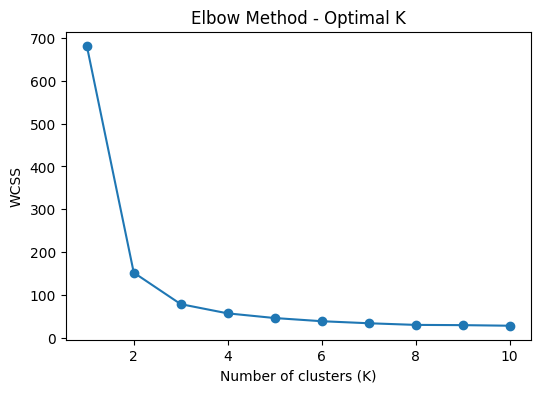

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


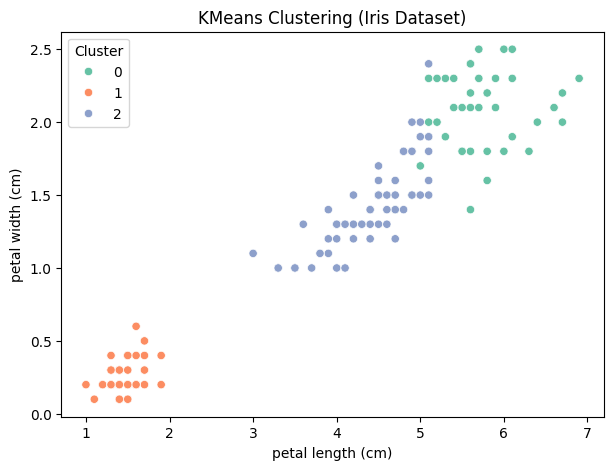

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data)


data['Cluster'] = labels


# Visualization: Petal Length vs Petal Width
plt.figure(figsize=(7,5))
sns.scatterplot(x=data['petal length (cm)'], y=data['petal width (cm)'], hue=data['Cluster'], palette='Set2')
plt.title('KMeans Clustering (Iris Dataset)')
plt.show()

KMeans Clustering 
1 Description of How KMeans Works

KMeans clustering groups data into K clusters by:

Selecting K random centroids.

Assigning each point to the nearest centroid.

Recomputing centroids based on assigned points.

Repeating until centroids stabilize.

It minimizes the within-cluster sum of squares (WCSS).

2 Why KMeans is Suitable for Iris Dataset?

 Iris dataset has well‑separated natural groups (Setosa, Versicolor, Virginica).
 Features are continuous numeric values, ideal for Euclidean distance.
 KMeans works well when clusters are compact and circular — Iris data fits this pattern.

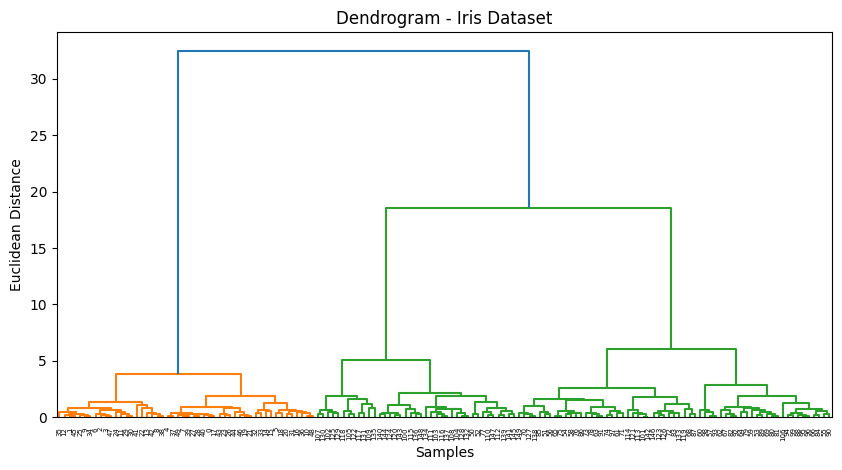

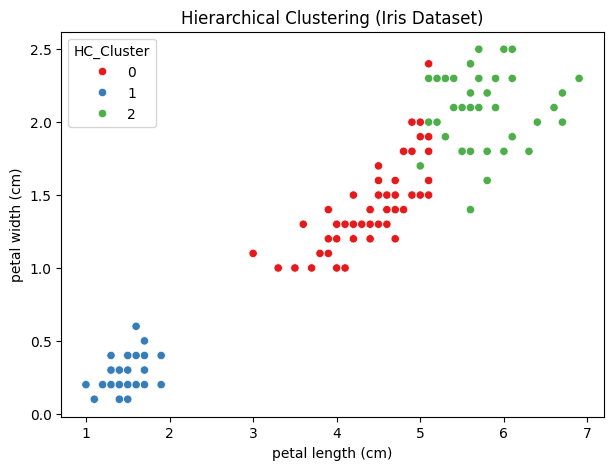

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Dendrogram
plt.figure(figsize=(10, 5))
link = linkage(data.iloc[:, :-1], method='ward')
dendrogram(link)
plt.title('Dendrogram - Iris Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Agglomerative Clustering (fixed)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(data.iloc[:, :-1])

data['HC_Cluster'] = hc_labels

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=data['petal length (cm)'],
    y=data['petal width (cm)'],
    hue=data['HC_Cluster'],
    palette='Set1'
)
plt.title('Hierarchical Clustering (Iris Dataset)')
plt.show()

Description of How Hierarchical Clustering Works

Hierarchical clustering builds clusters in two ways:

Agglomerative (Bottom‑Up)

Start with each point as a single cluster.

Merge the two closest clusters.

Repeat until only one cluster remains.

Divisive (Top‑Down)

Start with one big cluster.

Split into smaller clusters.

Most common: Agglomerative Clustering.

Dendrogram shows cluster merging levels.